# Laboratorio 4 - Data Science
## Clasificación de Imágenes con CNN (CIFAR-10)

### Autores:

- Nelson García 22434
- Christian Echeverría 221

## Parte 1: Preparación del Conjunto de Datos

### Importar librerías a usar:

In [44]:
!pip install scikit-learn

  Using cached scipy-1.16.1-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.5 MB/s  0:00:02m 9.9 MB/s eta 0:00:01
Using cached scipy-1.16.1-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2025-08-23 19:28:15.158572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("float32")

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("TF:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))
print("Dispositivo:", tf.config.list_logical_devices("GPU"))

TF: 2.20.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Dispositivo: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


I0000 00:00:1755998919.487001   11228 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1728 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:02:00.0, compute capability: 6.1


### Importar dataset y visualizar:

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
%matplotlib inline

### Miramos la forma que traen los datos

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
una_imagen = x_train[0]

In [8]:
una_imagen

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
una_imagen.shape

(32, 32, 3)

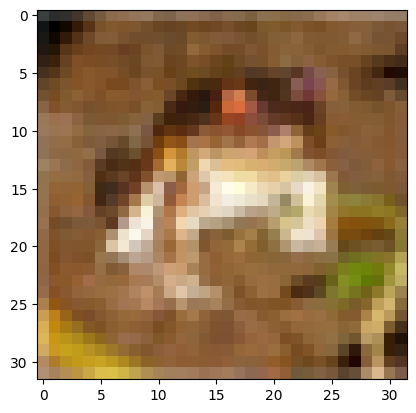

In [10]:
plt.imshow(una_imagen)

Son imágenes de 32*32, de colores por eso es el 3


### Normalizar datos:

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], shape=(10000, 1), dtype=uint8)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_cat_train = to_categorical(y_train, 10)

Se convierten los datos para que puedan ser usados por la CNN.

In [17]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(10000, 10))

In [18]:
y_cat_test.shape

(10000, 10)

In [19]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [20]:
y_cat_train.shape

(50000, 10)

In [21]:
una_imagen.max()

np.uint8(255)

In [22]:
una_imagen.min()

np.uint8(0)

In [23]:
x_train = x_train / 255
x_test = x_test / 255

Normalizamos los datos dividiendo por 255, ahora los valores estarán entre 0 y 1.

In [24]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [25]:
x_train.max()

np.float64(1.0)

In [26]:
x_train.min()

np.float64(0.0)

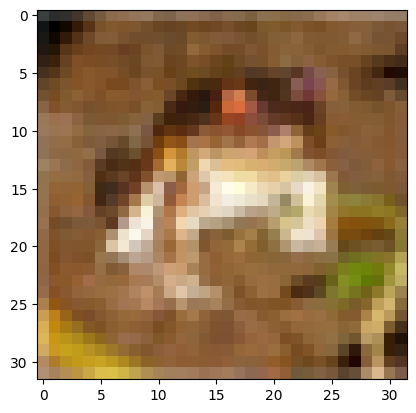

In [27]:
plt.imshow(x_train[0])

La imagen sigue igual.

### Cambio del formato de datos

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
x_test.shape

(10000, 32, 32, 3)

En este caso no es necesario cambiar el formato de los datos.

## Parte 2: Modelo Base ANN

In [30]:
import time
from tensorflow.keras import layers, models

### Definición del modelo ANN (Flatten -> Dense ReLU x 1-2 -> Softmax 10)


In [31]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Se compila el modelo:

In [32]:
model.compile(
    loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

In [36]:
start = time.time()
history = model.fit(
    x_train, y_cat_train,
    epochs=10,             
    batch_size=32,
    validation_data = (x_test,y_cat_test),
    callbacks = [detencion_temprana],
    verbose=2
)
elapsed = time.time() - start

2025-08-23 19:29:05.456613: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.
2025-08-23 19:29:06.194049: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2025-08-23 19:29:08.279080: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fddb8003140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-23 19:29:08.279158: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
2025-08-23 19:29:09.145618: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-23 19:29:10.304948: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91100
I0000 00:00:1755998953.212438   11295 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 - 14s - 9ms/step - accuracy: 0.3266 - loss: 1.8662 - val_accuracy: 0.3670 - val_loss: 1.7362
Epoch 2/10
1563/1563 - 5s - 3ms/step - accuracy: 0.3960 - loss: 1.6852 - val_accuracy: 0.4172 - val_loss: 1.6275
Epoch 3/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4235 - loss: 1.6077 - val_accuracy: 0.4286 - val_loss: 1.5995
Epoch 4/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4414 - loss: 1.5622 - val_accuracy: 0.4303 - val_loss: 1.6228
Epoch 5/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4549 - loss: 1.5244 - val_accuracy: 0.4439 - val_loss: 1.5656
Epoch 6/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4671 - loss: 1.4908 - val_accuracy: 0.4677 - val_loss: 1.5128
Epoch 7/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4735 - loss: 1.4669 - val_accuracy: 0.4662 - val_loss: 1.4993
Epoch 8/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4849 - loss: 1.4452 - val_accuracy: 0.4710 - val_loss: 1.4789
Epoch 9/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4911 - loss: 1.4220 - val_accuracy: 0.4524 - val_loss: 

### Evaluar modelo:

In [37]:
train_acc_last = history.history["accuracy"][-1]
val_acc_last   = history.history["val_accuracy"][-1]
best_val_acc   = max(history.history["val_accuracy"])

print(f"Tiempo de entrenamiento: {elapsed:.2f} s")
print(f"Exactitud entrenamiento (última época): {train_acc_last:.4f}")
print(f"Exactitud validación (última época):    {val_acc_last:.4f}")
print(f"Mejor exactitud validación:             {best_val_acc:.4f}")

Tiempo de entrenamiento: 56.60 s
Exactitud entrenamiento (última época): 0.4940
Exactitud validación (última época):    0.4826
Mejor exactitud validación:             0.4826


In [38]:
metricas = pd.DataFrame(model.history.history)

In [39]:
metricas.head()

,accuracy,loss,val_accuracy,val_loss
0,0.32660,1.866210,0.3670,1.736189
1,0.39598,1.685249,0.4172,1.627494
2,0.42352,1.607665,0.4286,1.599525
3,0.44142,1.562180,0.4303,1.622809
4,0.45494,1.524393,0.4439,1.565577


<Axes: >

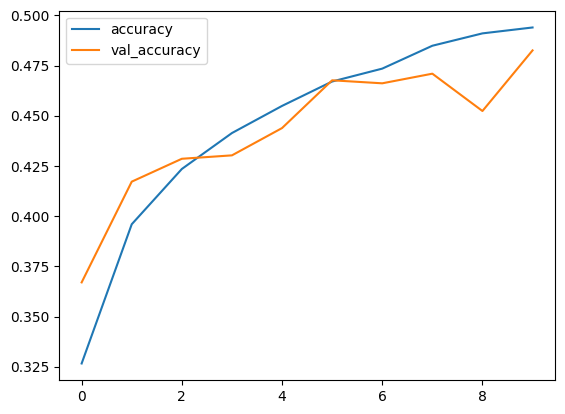

In [40]:
metricas[['accuracy', 'val_accuracy']].plot()

<Axes: >

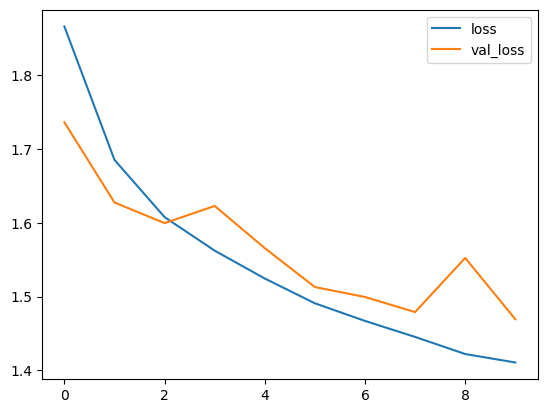

In [41]:
metricas[['loss', 'val_loss']].plot()

In [42]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose = 0))

['loss', 'compile_metrics']
[1.4691818952560425, 0.48260000348091125]


In [45]:
import sklearn

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

### Hacemos predicciones con el modelo:

In [49]:
predicciones = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
y_cat_test.shape

(10000, 10)

In [51]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [52]:
predicciones[0]

np.int64(3)

In [53]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], shape=(10000, 1), dtype=uint8)

In [54]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.66      0.44      0.53      1000
           1       0.55      0.68      0.61      1000
           2       0.41      0.31      0.36      1000
           3       0.34      0.30      0.32      1000
           4       0.44      0.45      0.44      1000
           5       0.41      0.35      0.38      1000
           6       0.41      0.70      0.52      1000
           7       0.65      0.40      0.50      1000
           8       0.52      0.72      0.61      1000
           9       0.53      0.47      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [55]:
confusion_matrix(y_test, predicciones)

array([[444,  67,  61,  29,  26,  14,  51,  17, 242,  49],
       [ 15, 684,  11,  21,  16,  22,  21,  17,  90, 103],
       [ 57,  28, 314,  87, 147,  70, 195,  38,  43,  21],
       [ 18,  30,  63, 296,  66, 184, 215,  29,  36,  63],
       [ 35,  18, 100,  55, 448,  49, 194,  41,  49,  11],
       [  9,  17,  79, 205,  66, 351, 173,  34,  37,  29],
       [  0,  25,  40,  53, 100,  40, 696,  10,  12,  24],
       [ 23,  33,  75,  76, 122,  84,  79, 403,  37,  68],
       [ 52,  78,  11,  25,  18,  22,  20,   6, 723,  45],
       [ 24, 270,   7,  27,  14,  20,  34,  24, 113, 467]])

<Axes: >

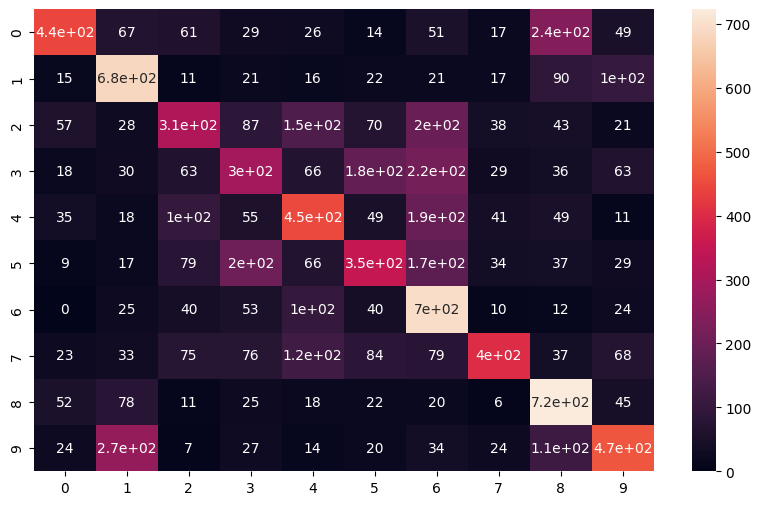

In [56]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test,predicciones),annot = True)

### Prediciendo una imagen dada:

In [68]:
mi_numero = x_test[11]

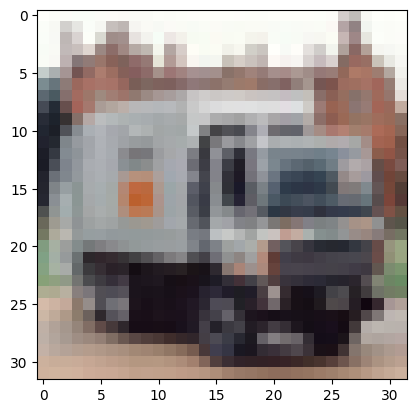

In [69]:
plt.imshow(mi_numero)

In [70]:
np.argmax(model.predict(mi_numero.reshape(1,32,32,3)), axis=-1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([9])

Categorías del conjunto de datos:

- Aviones -> 0
- Coches -> 1
- Pájaros -> 2
- Gatos -> 3
- Ciervo -> 4
- Perros - 5
- Ranas -> 6
- Caballos -> 7
- Barcos -> 8 
- Camiones -> 9

Como se puede ver acertamos en la predicción.

## Parte 3: Implementación de CNN

### Definicón del nuevo modelo:

In [83]:
cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    # Primera capa convolucional
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Segunda capa convolucional
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Aplanar y capas densas finales
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # salida para 10 clases
])

In [84]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,314 (165.29 KB)

 Trainable params: 42,314 (165.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compilación:

In [85]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Entrenamiento:

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
history_cnn = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,   # más pequeño para evitar problemas de memoria en tu GPU
    validation_data=(x_test, y_test),
    callbacks=[detencion_temprana],
    verbose=2
)